# Load the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import datetime


import yfinance as yf

from API import NEWS_API
from newsapi import NewsApiClient


import tensorflow as tf
from tensorflow import keras
from keras import layers

from sklearn.preprocessing import MinMaxScaler

# Choosing the dates

In [72]:
TRAIN_START_DATE = '2000-01-01'
TRAIN_END_DATE = '2022-12-31'
TEST_START_DATE = '2023-01-01'
TEST_END_DATE = '2024-12-31'

# Choosing the symbols

In [73]:
symbols = {
    'MSFT',
    'NVDA',
    'META',
    'AAPL'
}

# Load the train data

In [74]:
train_data = {}

for symbol in symbols:
    train_data[symbol] = yf.download(
                            symbol, 
                            start=TRAIN_START_DATE, 
                            end=TRAIN_END_DATE, 
                            interval="1d"
                        )

print(train_data["MSFT"])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2000-01-03   35.792316   36.425639   34.391330   36.041807  53228400
2000-01-04   34.583229   35.965023   34.468080   34.871103  54119000
2000-01-05   34.947880   35.734735   33.585277   34.122642  64059600
2000-01-06   33.777191   34.967069   33.278210   34.448897  54976600
2000-01-07   34.218609   34.468100   32.951964   33.354987  62013600
...                ...         ...         ...         ...       ...
2022-12-23  234.405411  234.542874  229.702188  231.832877  21207000
2022-12-27  232.667480  234.601780  231.557946  234.375951  16688600
2022-12-28  230.281494  235.377480  229.928015  232.598743  17457100
2022-12-29  236.644119  237.537638  231.381215  231.381215  19770700
2022-12-30  235.475677  235.613141  232.372917  233.894842  21938500

[5787 rows x 5 columns]


# Check the columns

In [75]:
print(train_data['NVDA'].columns)

MultiIndex([( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])


# Load the test data

In [76]:
test_data = {}

for symbol in symbols:
    test_data[symbol] = yf.download(
                            symbol, 
                            start=TEST_START_DATE, 
                            end=TEST_END_DATE, 
                            interval="1d"
                        )
print(test_data["MSFT"])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2023-01-03  235.240021  241.298250  233.099504  238.676618  25740000
2023-01-04  224.949875  228.651571  221.866756  228.072262  50623400
2023-01-05  218.282852  223.427935  217.742812  223.084269  39585600
2023-01-06  220.855392  221.670359  215.376487  218.960362  43613600
2023-01-09  223.005722  227.051099  222.308592  222.347861  27369800
...                ...         ...         ...         ...       ...
2024-12-23  434.379028  436.774220  431.963858  435.866037  19152500
2024-12-24  438.450836  438.720315  433.321138  433.780209   7164500
2024-12-26  437.233276  440.057630  435.756258  438.201337   8194200
2024-12-27  429.668457  434.349074  425.496829  433.730320  18117700
2024-12-30  423.979858  426.694417  421.055729  425.207408  13158700

[501 rows x 5 columns]


# Load the news with newsapi.org - only the previous month

In [77]:
newsapi = NewsApiClient(api_key=NEWS_API)

In [78]:
news_data = newsapi.get_everything(q = "Microsoft", language="en", page_size=20)

In [79]:
articles = news_data['articles']
news_df = pd.DataFrame(articles)

In [80]:
news_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-verge', 'name': 'The Verge'}",Tom Warren,Microsoft is testing free Office for Windows a...,Microsoft has started testing a free version o...,https://www.theverge.com/news/618278/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-02-25T09:58:17Z,"The free desktop versions of Word, Excel, and ..."
1,"{'id': 'the-verge', 'name': 'The Verge'}",Tom Warren,Microsoft is shutting down Skype in favor of T...,It’s the end of an era. Microsoft is shutting ...,https://www.theverge.com/news/621353/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-02-28T14:22:43Z,"Skype will be retired on May 5th, and existing..."
2,"{'id': 'the-verge', 'name': 'The Verge'}",Tom Warren,Microsoft releases a Copilot app for Mac,Microsoft is releasing a native Copilot app fo...,https://www.theverge.com/news/621114/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-02-27T20:42:04Z,The Copilot app on iPhone and iPad is also bei...
3,"{'id': 'the-verge', 'name': 'The Verge'}",Tom Warren,Microsoft makes Copilot Voice and Think Deeper...,Microsoft made OpenAI’s o1 reasoning model fre...,https://www.theverge.com/news/619199/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-02-25T17:53:48Z,You wont hit any limits using OpenAIs o1 reaso...
4,"{'id': 'the-verge', 'name': 'The Verge'}",Tom Warren,Microsoft announces quantum computing breakthr...,Microsoft believes it has made a key breakthro...,https://www.theverge.com/news/614205/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-02-19T13:56:29Z,Microsoft has spent 17 years researching a new...
5,"{'id': 'the-verge', 'name': 'The Verge'}",Tom Warren,Microsoft’s Xbox AI era starts with a model th...,I reported in November that Microsoft was abou...,https://www.theverge.com/news/615048/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-02-19T16:03:06Z,Microsoft Research and Xbox game studio Ninja ...
6,"{'id': None, 'name': 'Gizmodo.com'}",Mike Fazioli,"No Recurring Costs, Microsoft Office 2024 Life...",StackSocial's up to 36% off deal on the full s...,https://gizmodo.com/no-recurring-costs-microso...,https://gizmodo.com/app/uploads/2025/02/Micros...,2025-02-03T16:45:35Z,Productivity apps are only productive if they’...
7,"{'id': None, 'name': 'Gizmodo.com'}",AJ Dellinger,Microsoft Study Finds Relying on AI Kills Your...,Researchers from Microsoft and Carnegie Mellon...,https://gizmodo.com/microsoft-study-finds-rely...,https://gizmodo.com/app/uploads/2024/08/chatgp...,2025-02-10T19:50:01Z,Artificial intelligence may one day make human...
8,"{'id': None, 'name': 'Gizmodo.com'}",Kyle Barr,"Microsoft Plans to Kill Skype, but Did It Ever...",Microsoft will take Skype offline on May 5 and...,https://gizmodo.com/microsoft-plans-to-kill-sk...,https://gizmodo.com/app/uploads/2019/08/x7srfg...,2025-02-28T16:00:29Z,Skype is going to go the way of Dodo in a few ...
9,"{'id': None, 'name': 'Gizmodo.com'}",Thomas Maxwell,Microsoft Names Developers It Sued for Abusing...,Microsoft amended a lawsuit filed last year to...,https://gizmodo.com/microsoft-names-developers...,https://gizmodo.com/app/uploads/2024/12/micros...,2025-02-27T21:45:02Z,Microsoft is trying to show its commitment to ...


# Merge the train and test data and preprocess them

In [81]:
train_close_list = []
for symbol in symbols:
    tmp = train_data[symbol]['Close']
    train_close_list.append(tmp)

train_merged = pd.concat(train_close_list, axis=1)
train_merged.dropna(inplace=True)

print("Train merged shape:", train_merged.shape)
print(train_merged.head())

Train merged shape: (2673, 4)
Ticker           MSFT      NVDA       AAPL       META
Date                                                 
2012-05-18  23.350193  0.276960  15.961045  38.084522
2012-05-21  23.733114  0.281774  16.890934  33.900505
2012-05-22  23.741085  0.278335  16.761234  30.882034
2012-05-23  23.222548  0.285214  17.170197  31.878227
2012-05-24  23.190636  0.277648  17.012512  32.904305


In [82]:
test_close_list = []
for symbol in symbols:
    tmp = test_data[symbol]['Close']
    test_close_list.append(tmp)

test_merged = pd.concat(test_close_list, axis=1)
test_merged.dropna(inplace=True)

print("Test merged shape:", test_merged.shape)
print(test_merged.head())

Test merged shape: (501, 4)
Ticker            MSFT       NVDA        AAPL        META
Date                                                     
2023-01-03  235.240021  14.304595  123.632530  124.265312
2023-01-04  224.949875  14.738280  124.907707  126.885315
2023-01-05  218.282852  14.254632  123.583099  126.456947
2023-01-06  220.855392  14.848201  128.130249  129.525223
2023-01-09  223.005722  15.616641  128.654129  128.977325


# Scale the data

In [83]:
scaler = MinMaxScaler(feature_range=(0, 1))


train_values = train_merged.values
test_values = test_merged.values


scaler.fit(train_values)


train_scaled = scaler.transform(train_values)
test_scaled = scaler.transform(test_values)

print("Scaled train shape:", train_scaled.shape)
print("Scaled test shape:", test_scaled.shape)

Scaled train shape: (2673, 4)
Scaled test shape: (501, 4)


# Predict the price when looking back 2 months ago

In [84]:
def create_sequences_multisymbol(dataset, lookback=60):
    """
    dataset: NumPy array of shape (num_days, 4) for 4 symbols
    lookback: number of timesteps to use as input
    
    Returns X, y:
      X.shape = (num_samples, lookback, 4)
      y.shape = (num_samples, 4)
    """
    X, y = [], []
    for i in range(len(dataset) - lookback):
        seq_X = dataset[i : i + lookback]   # shape (lookback, 4)
        seq_y = dataset[i + lookback]       # shape (4,)
        X.append(seq_X)
        y.append(seq_y)
    return np.array(X), np.array(y)

lookback_window = 10
X_train_all, y_train_all = create_sequences_multisymbol(train_scaled, lookback_window)
X_test_all, y_test_all = create_sequences_multisymbol(test_scaled, lookback_window)

print("X_train_all shape:", X_train_all.shape)  # (num_samples, 60, 4)
print("y_train_all shape:", y_train_all.shape)  # (num_samples, 4)

print("X_test_all shape:", X_test_all.shape)
print("y_test_all shape:", y_test_all.shape)


X_train_all shape: (2663, 10, 4)
y_train_all shape: (2663, 4)
X_test_all shape: (491, 10, 4)
y_test_all shape: (491, 4)


# Build model

In [85]:
model = keras.Sequential([
    layers.Input(shape=(lookback_window, 4)),
    # First LSTM layer returns the entire sequence for the next LSTM
    layers.LSTM(64, return_sequences=True),
    # Second LSTM layer returns the final output
    layers.LSTM(64, return_sequences=False),
    # Dense layer for your final output (4 symbols)
    layers.Dense(4)
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 10, 64)            17664     
                                                                 
 lstm_17 (LSTM)              (None, 64)                33024     
                                                                 
 dense_9 (Dense)             (None, 4)                 260       
                                                                 
Total params: 50,948
Trainable params: 50,948
Non-trainable params: 0
_________________________________________________________________


# Train model

In [86]:
history = model.fit(
    X_train_all,
    y_train_all,
    epochs=20,
    batch_size=32,
    validation_split=0.1,   # 10% of training data used for validation
    verbose=1
)

Epoch 1/20
75/75 [==============================] - 3s 12ms/step - loss: 0.0085 - val_loss: 0.0163
Epoch 2/20
75/75 [==============================] - 0s 5ms/step - loss: 6.4498e-04 - val_loss: 0.0070
Epoch 3/20
75/75 [==============================] - 0s 5ms/step - loss: 4.4504e-04 - val_loss: 0.0041
Epoch 4/20
75/75 [==============================] - 0s 6ms/step - loss: 3.4596e-04 - val_loss: 0.0021
Epoch 5/20
75/75 [==============================] - 0s 5ms/step - loss: 2.8551e-04 - val_loss: 0.0022
Epoch 6/20
75/75 [==============================] - 0s 6ms/step - loss: 2.4875e-04 - val_loss: 0.0024
Epoch 7/20
75/75 [==============================] - 0s 6ms/step - loss: 2.3015e-04 - val_loss: 0.0021
Epoch 8/20
75/75 [==============================] - 0s 6ms/step - loss: 2.2453e-04 - val_loss: 0.0023
Epoch 9/20
75/75 [==============================] - 0s 5ms/step - loss: 2.1951e-04 - val_loss: 0.0020
Epoch 10/20
75/75 [==============================] - 0s 6ms/step - loss: 2.1421e-04 -

In [87]:
pred_scaled = model.predict(X_test_all)       # shape = (num_samples, 4)
y_test_pred = scaler.inverse_transform(pred_scaled)
y_test_true = scaler.inverse_transform(y_test_all)

print("Predicted shape:", y_test_pred.shape)
print("Actual shape:", y_test_true.shape)

# Print the first few predictions vs actual
for i in range(10):
    print(f"Day {i}: ")
    print("  Predicted:", y_test_pred[i])
    print("  Actual:   ", y_test_true[i])

16/16 [==============================] - 0s 2ms/step
Predicted shape: (491, 4)
Actual shape: (491, 4)
Day 0: 
  Predicted: [226.58667  16.16497 128.79698 146.25168]
  Actual:    [231.53831482  17.36437035 133.6559906  132.5138092 ]
Day 1: 
  Predicted: [226.93726   16.509504 130.09067  147.0639  ]
  Actual:    [227.72859192  16.75281525 133.715271   135.63189697]
Day 2: 
  Predicted: [227.87837   16.768381 130.99426  147.66083 ]
  Actual:    [235.86842346  17.82603455 136.28541565 138.83963013]
Day 3: 
  Predicted: [229.41736   17.084644 131.99846  148.50267 ]
  Actual:    [238.1856842   19.17905045 139.4881897  142.72479248]
Day 4: 
  Predicted: [230.97972   17.468521 133.01576  150.00569 ]
  Actual:    [237.65545654  19.25099373 140.89183044 142.5953064 ]
Day 5: 
  Predicted: [232.42607  17.84326 134.20131 151.75865]
  Actual:    [236.25134277  19.30895615 140.22955322 140.96153259]
Day 6: 
  Predicted: [233.67197  18.21417 135.35574 153.01201]
  Actual:    [243.50749207  19.78760719

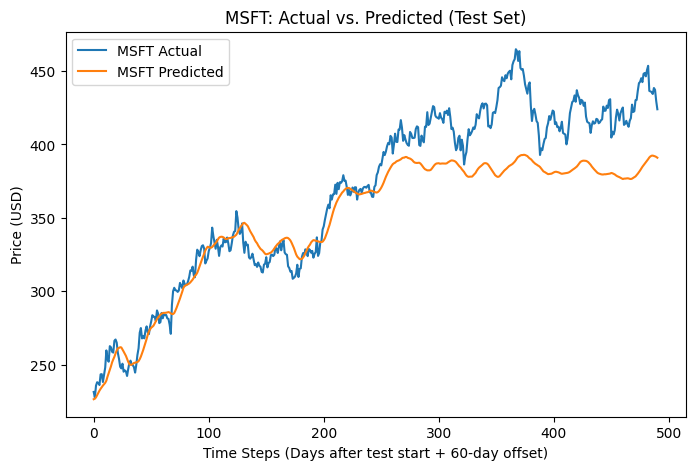

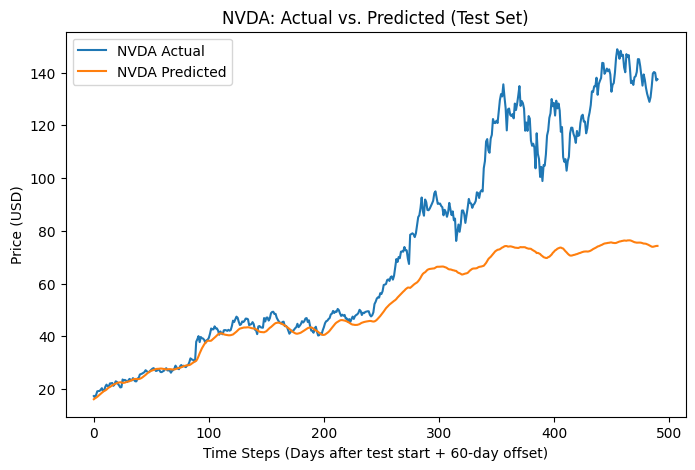

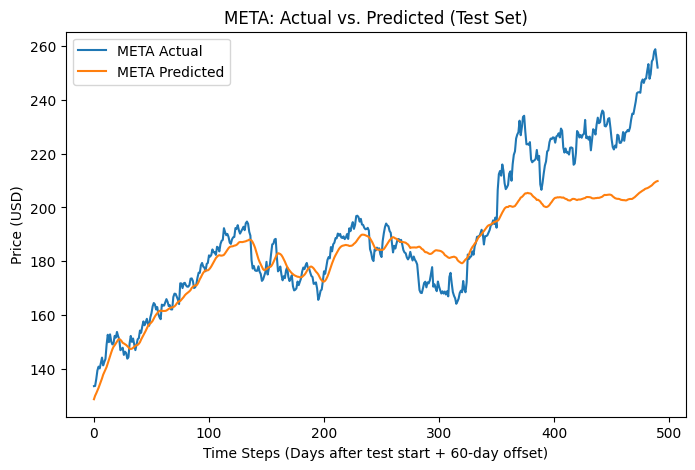

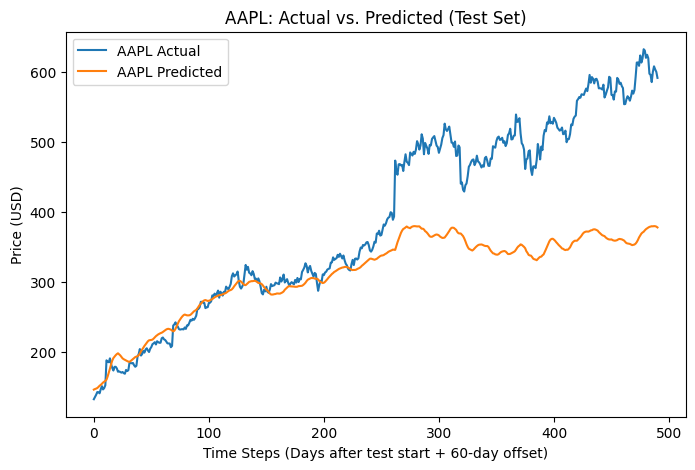

In [91]:

for i, symbol in enumerate(symbols):
    # Extract actual vs. predicted for this symbol (i)
    actual = y_test_true[:, i]
    predicted = y_test_pred[:, i]

    plt.figure(figsize=(8, 5))
    plt.plot(actual, label=f"{symbol} Actual")
    plt.plot(predicted, label=f"{symbol} Predicted")
    plt.legend()
    plt.title(f"{symbol}: Actual vs. Predicted (Test Set)")
    plt.xlabel("Time Steps (Days after test start + 60-day offset)")
    plt.ylabel("Price (USD)")
    plt.show()
